In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from qgrid import show_grid as exl
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df = df[df.Response==1]

In [10]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1


In [11]:
for i in df.columns:
    print(i)

ID
City_Code
Region_Code
Accomodation_Type
Reco_Insurance_Type
Upper_Age
Lower_Age
Is_Spouse
Health Indicator
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium
Response


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 2 to 50880
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12209 non-null  int64  
 1   City_Code                12209 non-null  object 
 2   Region_Code              12209 non-null  int64  
 3   Accomodation_Type        12209 non-null  object 
 4   Reco_Insurance_Type      12209 non-null  object 
 5   Upper_Age                12209 non-null  int64  
 6   Lower_Age                12209 non-null  int64  
 7   Is_Spouse                12209 non-null  object 
 8   Health Indicator         9471 non-null   object 
 9   Holding_Policy_Duration  7370 non-null   object 
 10  Holding_Policy_Type      7370 non-null   float64
 11  Reco_Policy_Cat          12209 non-null  int64  
 12  Reco_Policy_Premium      12209 non-null  float64
 13  Response                 12209 non-null  int64  
dtypes: float64(2), int64(6

In [13]:
# Percentage of missing data
(df.isna().sum()/len(df))*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.426079
Holding_Policy_Duration    39.634696
Holding_Policy_Type        39.634696
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

# <center>Analysing Data</center>

# 1. City Code

In [14]:
df.City_Code.head()

2      C5
5      C9
7      C1
9      C1
10    C28
Name: City_Code, dtype: object

In [15]:
df.City_Code.unique()

array(['C5', 'C9', 'C1', 'C28', 'C7', 'C3', 'C24', 'C2', 'C25', 'C10',
       'C16', 'C4', 'C27', 'C11', 'C8', 'C18', 'C33', 'C15', 'C20', 'C13',
       'C19', 'C21', 'C17', 'C22', 'C34', 'C6', 'C12', 'C14', 'C36',
       'C23', 'C29', 'C26', 'C32', 'C31', 'C35', 'C30'], dtype=object)

In [16]:
len(df.City_Code.unique())

36

In [17]:
Counter(df.City_Code)

Counter({'C5': 314,
         'C9': 510,
         'C1': 2208,
         'C28': 67,
         'C7': 484,
         'C3': 1161,
         'C24': 130,
         'C2': 1893,
         'C25': 88,
         'C10': 364,
         'C16': 269,
         'C4': 889,
         'C27': 76,
         'C11': 279,
         'C8': 437,
         'C18': 190,
         'C33': 71,
         'C15': 253,
         'C20': 212,
         'C13': 255,
         'C19': 208,
         'C21': 155,
         'C17': 265,
         'C22': 119,
         'C34': 36,
         'C6': 460,
         'C12': 198,
         'C14': 176,
         'C36': 5,
         'C23': 156,
         'C29': 91,
         'C26': 108,
         'C32': 46,
         'C31': 2,
         'C35': 16,
         'C30': 18})

In [18]:
Counter(df.City_Code).most_common(10)

[('C1', 2208),
 ('C2', 1893),
 ('C3', 1161),
 ('C4', 889),
 ('C9', 510),
 ('C7', 484),
 ('C6', 460),
 ('C8', 437),
 ('C10', 364),
 ('C5', 314)]

In [19]:
Counter(df.Accomodation_Type)

Counter({'Owned': 6763, 'Rented': 5446})

In [20]:
temp = df[['City_Code', 'Accomodation_Type']]
temp['at'] = np.ones(len(df))

In [21]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Owned'), ascending=False)

at       
Accomodation_Type Owned Rented
City_Code                     
C1                 1482    726
C2                 1090    803
C3                  640    521
C4                  492    397
C7                  354    130
C9                  241    269
C8                  207    230
C6                  201    259
C11                 148    131
C17                 146    119
C19                 143     65
C10                 137    227
C15                 135    118
C5                  134    180
C13                 120    135
C16                 117    152
C21                 104     51
C20                  94    118
C18                  91     99
C12                  88    110
C24                  87     43
C22                  65     54
C14                  65    111
C23                  64     92
C26                  49     59
C27                  46     30
C28                  40     27
C25                  38     50
C29                  37     54
C33                  33     38
C32                  31     15
C34                  15     21
C35                  13      3
C30                  12      6
C36                   3      2
C31                   1      1

In [22]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Rented'), ascending=False)

at       
Accomodation_Type Owned Rented
City_Code                     
C2                 1090    803
C1                 1482    726
C3                  640    521
C4                  492    397
C9                  241    269
C6                  201    259
C8                  207    230
C10                 137    227
C5                  134    180
C16                 117    152
C13                 120    135
C11                 148    131
C7                  354    130
C17                 146    119
C20                  94    118
C15                 135    118
C14                  65    111
C12                  88    110
C18                  91     99
C23                  64     92
C19                 143     65
C26                  49     59
C29                  37     54
C22                  65     54
C21                 104     51
C25                  38     50
C24                  87     43
C33                  33     38
C27                  46     30
C28                  40     27
C34                  15     21
C32                  31     15
C30                  12      6
C35                  13      3
C36                   3      2
C31                   1      1

In [23]:
Counter(df.Reco_Insurance_Type)

Counter({'Individual': 9640, 'Joint': 2569})

In [24]:
df[df.Reco_Insurance_Type=='Joint'].head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
39,40,C3,927,Rented,Joint,49,47,Yes,X4,3.0,3.0,18,22568.0,1
48,49,C2,2858,Owned,Joint,57,55,Yes,X4,8.0,4.0,17,28260.0,1
88,89,C1,1154,Owned,Joint,66,64,Yes,X4,14+,3.0,7,24192.0,1


In [25]:
df[df.Reco_Insurance_Type=='Individual'].head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1
27,28,C9,855,Rented,Individual,21,21,No,X5,NaN,NaN,16,3744.0,1


In [26]:
temp = df[['City_Code', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [27]:
temp.pivot_table(index=['City_Code'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Individual'), ascending=False)

at       
Reco_Insurance_Type Individual  Joint
City_Code                            
C1                      1647.0  561.0
C2                      1489.0  404.0
C3                       946.0  215.0
C4                       770.0  119.0
C9                       436.0   74.0
C6                       381.0   79.0
C8                       347.0   90.0
C7                       331.0  153.0
C10                      292.0   72.0
C5                       263.0   51.0
C11                      219.0   60.0
C13                      217.0   38.0
C16                      198.0   71.0
C17                      195.0   70.0
C15                      183.0   70.0
C20                      171.0   41.0
C19                      158.0   50.0
C12                      154.0   44.0
C14                      153.0   23.0
C18                      147.0   43.0
C23                      127.0   29.0
C21                      125.0   30.0
C22                       95.0   24.0
C24                       94.0   36.0
C26                       88.0   20.0
C29                       72.0   19.0
C25                       72.0   16.0
C27                       60.0   16.0
C33                       55.0   16.0
C28                       55.0   12.0
C32                       39.0    7.0
C34                       31.0    5.0
C35                       14.0    2.0
C30                       12.0    6.0
C36                        2.0    3.0
C31                        2.0    NaN

In [28]:
temp.pivot_table(index=['City_Code'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Joint'), ascending=False)

at       
Reco_Insurance_Type Individual  Joint
City_Code                            
C1                      1647.0  561.0
C2                      1489.0  404.0
C3                       946.0  215.0
C7                       331.0  153.0
C4                       770.0  119.0
C8                       347.0   90.0
C6                       381.0   79.0
C9                       436.0   74.0
C10                      292.0   72.0
C16                      198.0   71.0
C17                      195.0   70.0
C15                      183.0   70.0
C11                      219.0   60.0
C5                       263.0   51.0
C19                      158.0   50.0
C12                      154.0   44.0
C18                      147.0   43.0
C20                      171.0   41.0
C13                      217.0   38.0
C24                       94.0   36.0
C21                      125.0   30.0
C23                      127.0   29.0
C22                       95.0   24.0
C14                      153.0   23.0
C26                       88.0   20.0
C29                       72.0   19.0
C33                       55.0   16.0
C27                       60.0   16.0
C25                       72.0   16.0
C28                       55.0   12.0
C32                       39.0    7.0
C30                       12.0    6.0
C34                       31.0    5.0
C36                        2.0    3.0
C35                       14.0    2.0
C31                        2.0    NaN

In [29]:
temp = df[['Accomodation_Type', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [30]:
temp.pivot_table(index=['Accomodation_Type'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Individual'), ascending=False)

at      
Reco_Insurance_Type Individual Joint
Accomodation_Type                   
Owned                     4886  1877
Rented                    4754   692

In [31]:
temp = df[['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [32]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type','Reco_Insurance_Type'],values=['at'], aggfunc='count')

at                         
Accomodation_Type        Owned            Rented       
Reco_Insurance_Type Individual  Joint Individual  Joint
City_Code                                              
C1                      1023.0  459.0      624.0  102.0
C10                       97.0   40.0      195.0   32.0
C11                      103.0   45.0      116.0   15.0
C12                       65.0   23.0       89.0   21.0
C13                      100.0   20.0      117.0   18.0
C14                       46.0   19.0      107.0    4.0
C15                       88.0   47.0       95.0   23.0
C16                       73.0   44.0      125.0   27.0
C17                       99.0   47.0       96.0   23.0
C18                       68.0   23.0       79.0   20.0
C19                      102.0   41.0       56.0    9.0
C2                       775.0  315.0      714.0   89.0
C20                       64.0   30.0      107.0   11.0
C21                       82.0   22.0       43.0    8.0
C22                       46.0   19.0       49.0    5.0
C23                       45.0   19.0       82.0   10.0
C24                       61.0   26.0       33.0   10.0
C25                       29.0    9.0       43.0    7.0
C26                       39.0   10.0       49.0   10.0
C27                       33.0   13.0       27.0    3.0
C28                       31.0    9.0       24.0    3.0
C29                       30.0    7.0       42.0   12.0
C3                       479.0  161.0      467.0   54.0
C30                        7.0    5.0        5.0    1.0
C31                        1.0    NaN        1.0    NaN
C32                       25.0    6.0       14.0    1.0
C33                       24.0    9.0       31.0    7.0
C34                       10.0    5.0       21.0    NaN
C35                       11.0    2.0        3.0    NaN
C36                        NaN    3.0        2.0    NaN
C4                       411.0   81.0      359.0   38.0
C5                       101.0   33.0      162.0   18.0
C6                       153.0   48.0      228.0   31.0
C7                       222.0  132.0      109.0   21.0
C8                       148.0   59.0      199.0   31.0
C9                       195.0   46.0      241.0   28.0

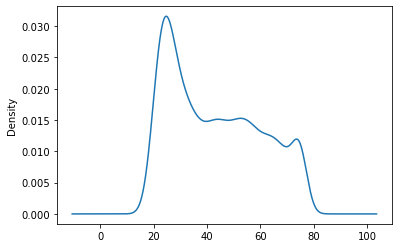

In [33]:
df[df.Reco_Insurance_Type=='Individual'].Upper_Age.plot.kde()

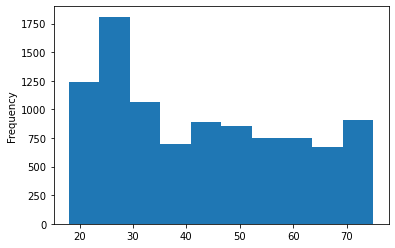

In [34]:
df[df.Reco_Insurance_Type=='Individual'].Upper_Age.plot.hist()

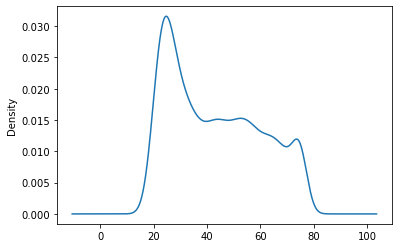

In [35]:
df[df.Reco_Insurance_Type=='Individual'].Lower_Age.plot.kde()

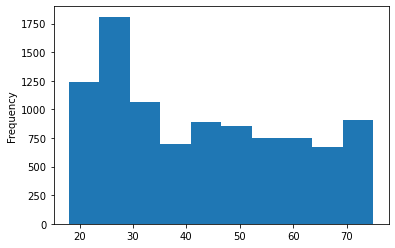

In [36]:
df[df.Reco_Insurance_Type=='Individual'].Lower_Age.plot.hist()

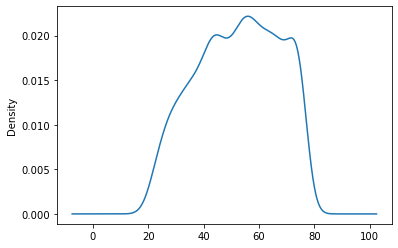

In [37]:
df[df.Reco_Insurance_Type=='Joint'].Upper_Age.plot.kde()

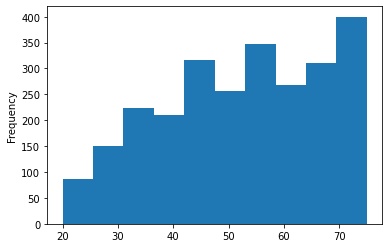

In [38]:
df[df.Reco_Insurance_Type=='Joint'].Upper_Age.plot.hist()

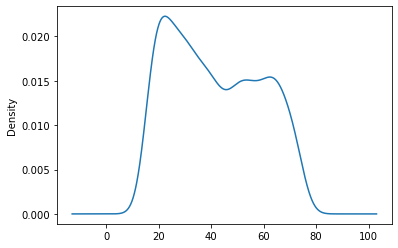

In [39]:
df[df.Reco_Insurance_Type=='Joint'].Lower_Age.plot.kde()

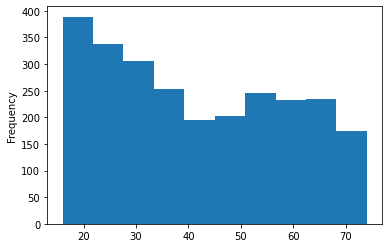

In [40]:
df[df.Reco_Insurance_Type=='Joint'].Lower_Age.plot.hist()

In [41]:
len(df['Health Indicator'].unique())-1

9

In [42]:
Counter(df['Health Indicator'])

Counter({nan: 2738,
         'X2': 2491,
         'X4': 1396,
         'X5': 408,
         'X3': 1599,
         'X1': 3176,
         'X6': 307,
         'X7': 62,
         'X9': 14,
         'X8': 18})

In [43]:
df.pivot_table(index=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

,Lower_Age
Health Indicator,
X1,41.854219
X2,43.269771
X3,41.316448
X4,43.460602
X5,46.151961
X6,42.755700
X7,52.274194
X8,45.222222
X9,46.928571


In [44]:
df.pivot_table(index=['Health Indicator'], values=['Upper_Age'], aggfunc=np.mean)

,Upper_Age
Health Indicator,
X1,43.890113
X2,45.449619
X3,43.716073
X4,45.862464
X5,48.536765
X6,45.342020
X7,54.983871
X8,48.555556
X9,49.428571


In [45]:
df.pivot_table(index=['Accomodation_Type'], columns=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

Lower_Age                                              \
Health Indicator          X1         X2         X3         X4         X5   
Accomodation_Type                                                          
Owned              48.166977  48.069720  47.651899  47.733560  50.007067   
Rented             35.355911  36.438716  35.129790  36.128405  37.424000   

                                                               
Health Indicator          X6         X7         X8         X9  
Accomodation_Type                                              
Owned              50.083333  53.403846  53.916667  46.000000  
Rented             36.282209  46.400000  27.833333  47.857143

In [46]:
df.pivot_table(index=['Accomodation_Type'], columns=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

Lower_Age                                              \
Health Indicator          X1         X2         X3         X4         X5   
Accomodation_Type                                                          
Owned              48.166977  48.069720  47.651899  47.733560  50.007067   
Rented             35.355911  36.438716  35.129790  36.128405  37.424000   

                                                               
Health Indicator          X6         X7         X8         X9  
Accomodation_Type                                              
Owned              50.083333  53.403846  53.916667  46.000000  
Rented             36.282209  46.400000  27.833333  47.857143

In [47]:
temp = df[['Health Indicator', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(index=['Accomodation_Type', 'Health Indicator'], values=['count'], aggfunc='count')

count
Accomodation_Type Health Indicator       
Owned             X1                 1611
                  X2                 1463
                  X3                  790
                  X4                  882
                  X5                  283
                  X6                  144
                  X7                   52
                  X8                   12
                  X9                    7
Rented            X1                 1565
                  X2                 1028
                  X3                  809
                  X4                  514
                  X5                  125
                  X6                  163
                  X7                   10
                  X8                    6
                  X9                    7

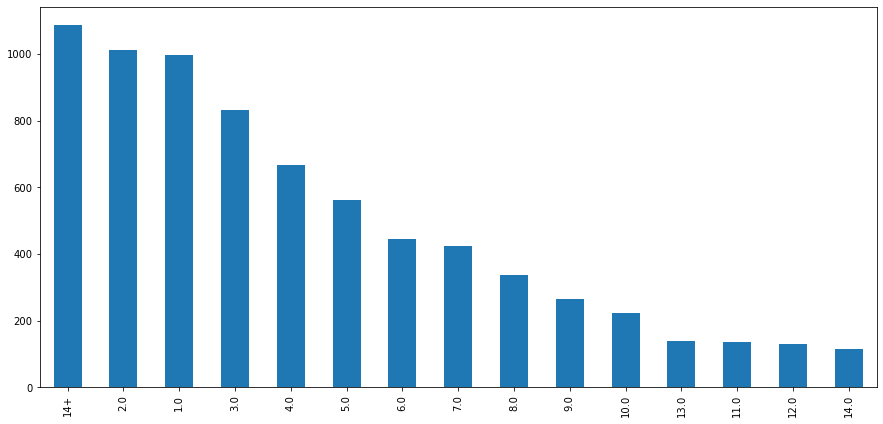

In [48]:
plt.figure(figsize=(15, 7))

df.Holding_Policy_Duration.value_counts().plot.bar()

In [49]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
14+                       866    221
2.0                       509    502
1.0                       481    516
3.0                       435    397
4.0                       385    282
5.0                       358    205
6.0                       303    142
7.0                       263    160
8.0                       232    106
9.0                       190     75
10.0                      148     74
11.0                      111     26
13.0                       99     39
12.0                       88     42
14.0                       86     29

In [50]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
1.0                       481    516
2.0                       509    502
3.0                       435    397
4.0                       385    282
14+                       866    221
5.0                       358    205
7.0                       263    160
6.0                       303    142
8.0                       232    106
9.0                       190     75
10.0                      148     74
12.0                       88     42
13.0                       99     39
14.0                       86     29
11.0                      111     26

In [51]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
1.0                       481    516
2.0                       509    502
3.0                       435    397
4.0                       385    282
14+                       866    221
5.0                       358    205
7.0                       263    160
6.0                       303    142
8.0                       232    106
9.0                       190     75
10.0                      148     74
12.0                       88     42
13.0                       99     39
14.0                       86     29
11.0                      111     26

In [52]:
temp = df.loc[df.Is_Spouse=='Yes'][['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(temp))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
14+                       215     28
3.0                       112     48
1.0                       107     41
2.0                        89     57
4.0                        81     41
6.0                        79     15
5.0                        72     22
7.0                        66     21
8.0                        62     19
9.0                        56     10
10.0                       40      9
11.0                       38      5
13.0                       22      3
14.0                       22      2
12.0                       21      4

In [53]:
df.Holding_Policy_Type.value_counts()

3.0    3217
1.0    1927
2.0    1190
4.0    1036
Name: Holding_Policy_Type, dtype: int64

In [54]:
x = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

for i in x:
    print(f"---------------{i.upper()}----------------")
    print(df[df.Holding_Policy_Type==3][i].value_counts().sort_values(ascending=False), end='\n\n\n')

---------------CITY_CODE----------------
C2     714
C1     563
C3     322
C4     244
C9     131
C8     130
C7     114
C6     108
C10     88
C5      77
C20     68
C11     65
C13     62
C16     53
C14     45
C15     45
C21     38
C12     37
C22     33
C26     32
C23     31
C17     28
C27     26
C25     22
C29     22
C24     17
C18     17
C19     17
C28     16
C32     16
C33     14
C30      8
C35      5
C34      4
C36      3
C31      2
Name: City_Code, dtype: int64


---------------ACCOMODATION_TYPE----------------
Owned     2153
Rented    1064
Name: Accomodation_Type, dtype: int64


---------------RECO_INSURANCE_TYPE----------------
Individual    2435
Joint          782
Name: Reco_Insurance_Type, dtype: int64


---------------IS_SPOUSE----------------
No     2580
Yes     637
Name: Is_Spouse, dtype: int64


---------------HEALTH INDICATOR----------------
X1    793
X2    697
X4    395
X3    393
X5    112
X6     72
X7     17
X8      4
X9      1
Name: Health Indicator, dtype: int64


-------

In [55]:
x = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

for i in x:
    print(f"---------------{i.upper()}----------------")
    print(df[df.Holding_Policy_Type==1][i].value_counts().sort_values(ascending=False), end='\n\n\n')

---------------CITY_CODE----------------
C1     399
C3     206
C4     149
C2     139
C17     83
C10     81
C7      76
C19     75
C15     70
C9      68
C6      64
C18     56
C5      55
C16     45
C8      45
C13     39
C24     39
C12     37
C11     34
C14     26
C26     19
C21     18
C20     16
C25     15
C28     14
C22     14
C23     13
C29     10
C33     10
C34      6
C32      3
C27      3
Name: City_Code, dtype: int64


---------------ACCOMODATION_TYPE----------------
Owned     982
Rented    945
Name: Accomodation_Type, dtype: int64


---------------RECO_INSURANCE_TYPE----------------
Individual    1548
Joint          379
Name: Reco_Insurance_Type, dtype: int64


---------------IS_SPOUSE----------------
No     1649
Yes     278
Name: Is_Spouse, dtype: int64


---------------HEALTH INDICATOR----------------
X1    566
X2    387
X3    284
X4    188
X6     46
X5     43
X7      6
X8      5
X9      3
Name: Health Indicator, dtype: int64


---------------HOLDING_POLICY_DURATION---------------

In [56]:
temp = df[['Reco_Policy_Cat', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type Owned Rented
Reco_Policy_Cat               
22                 1268    900
18                  816    409
17                  680    441
21                  648    326
19                  499    528
20                  422    388
16                  403    510
15                  361    391
12                  250    433
14                  246    179
5                   201     92
13                  144    224
8                   126     83
3                   125     80
2                   107    147
7                   104     51
6                    91     56
10                   81     55
11                   77     53
9                    77     54
4                    33     42
1                     4      4

In [57]:
temp = df[['Reco_Policy_Cat', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type Owned Rented
Reco_Policy_Cat               
22                 1268    900
19                  499    528
16                  403    510
17                  680    441
12                  250    433
18                  816    409
15                  361    391
20                  422    388
21                  648    326
13                  144    224
14                  246    179
2                   107    147
5                   201     92
8                   126     83
3                   125     80
6                    91     56
10                   81     55
9                    77     54
11                   77     53
7                   104     51
4                    33     42
1                     4      4

In [58]:
temp = df[['Health Indicator', 'Reco_Policy_Cat']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Health Indicator'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')

count                                                  
Health Indicator     X1     X2     X3     X4     X5    X6    X7   X8   X9
Reco_Policy_Cat                                                          
1                   NaN    4.0    1.0    NaN    NaN   1.0   NaN  1.0  NaN
2                  72.0   29.0   53.0   17.0    5.0  21.0   NaN  1.0  2.0
3                  53.0   48.0   23.0   30.0    7.0   3.0   NaN  NaN  NaN
4                  21.0   21.0    9.0    8.0    2.0   NaN   NaN  NaN  NaN
5                  70.0   65.0   32.0   33.0    4.0   2.0   2.0  NaN  NaN
6                  40.0   33.0   15.0   14.0    4.0   1.0   NaN  NaN  NaN
7                  31.0   35.0   24.0   23.0    7.0   NaN   NaN  2.0  NaN
8                  52.0   62.0   16.0   26.0    8.0   3.0   NaN  NaN  NaN
9                  36.0   32.0   17.0   14.0    2.0   NaN   NaN  NaN  NaN
10                 26.0   31.0   20.0   18.0    4.0   1.0   NaN  NaN  NaN
11                 33.0   28.0   20.0   14.0    5.0   1.0   NaN  NaN  NaN
12                183.0  106.0  126.0   40.0   12.0  43.0   2.0  3.0  5.0
13                 92.0   66.0   63.0   23.0    6.0  27.0   1.0  1.0  2.0
14                114.0   67.0   72.0   33.0    6.0  37.0   2.0  1.0  NaN
15                216.0  120.0  123.0   57.0   14.0  50.0   2.0  5.0  NaN
16                238.0  191.0  143.0   94.0   14.0  21.0   3.0  1.0  1.0
17                269.0  220.0  133.0  160.0   60.0  18.0   9.0  NaN  NaN
18                311.0  271.0  140.0  164.0   46.0  10.0   6.0  NaN  NaN
19                314.0  205.0  140.0  103.0   24.0  15.0   NaN  NaN  1.0
20                233.0  176.0  104.0   81.0   13.0  15.0   4.0  NaN  2.0
21                244.0  236.0   99.0  111.0   35.0  14.0   4.0  1.0  NaN
22                528.0  445.0  226.0  333.0  130.0  24.0  27.0  2.0  1.0

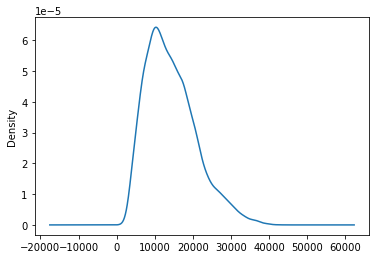

In [59]:
df.Reco_Policy_Premium.plot.kde()

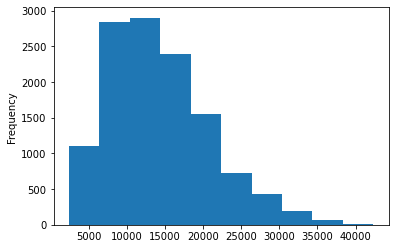

In [60]:
df.Reco_Policy_Premium.plot.hist()

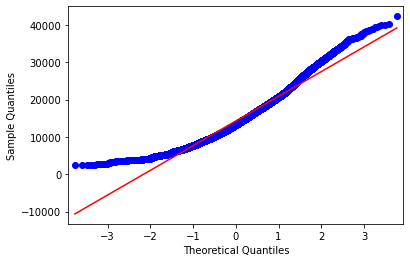

In [61]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = df.Reco_Policy_Premium
sm.qqplot(my_data, line='s')
pylab.show()

In [62]:
df.Reco_Policy_Premium.skew()

0.7755924362419984

In [63]:
temp = df[['Reco_Policy_Cat', 'Reco_Insurance_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Reco_Insurance_Type'],
                 index=['Reco_Policy_Cat'],
                 values=['count'],
                 aggfunc='count').sort_values(by=('count', 'Individual'), ascending=False)

count      
Reco_Insurance_Type Individual Joint
Reco_Policy_Cat                     
22                        1684   484
18                         950   275
17                         828   293
19                         815   212
16                         750   163
21                         733   241
20                         667   143
15                         597   155
12                         574   109
14                         343    82
13                         302    66
5                          226    67
2                          208    46
3                          167    38
8                          165    44
10                         118    18
7                          118    37
11                         113    17
6                          110    37
9                          106    25
4                           60    15
1                            6     2

In [64]:
temp = df[['Reco_Policy_Cat', 'Reco_Insurance_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Reco_Insurance_Type'],
                 index=['Reco_Policy_Cat'],
                 values=['count'],
                 aggfunc='count').sort_values(by=('count', 'Joint'), ascending=False)

count      
Reco_Insurance_Type Individual Joint
Reco_Policy_Cat                     
22                        1684   484
17                         828   293
18                         950   275
21                         733   241
19                         815   212
16                         750   163
15                         597   155
20                         667   143
12                         574   109
14                         343    82
5                          226    67
13                         302    66
2                          208    46
8                          165    44
3                          167    38
7                          118    37
6                          110    37
9                          106    25
10                         118    18
11                         113    17
4                           60    15
1                            6     2

In [65]:
df[df.Reco_Policy_Cat==22].Reco_Policy_Premium.describe()

count     2168.000000
mean     14464.905074
std       6764.605984
min       2612.000000
25%       9282.000000
50%      13506.000000
75%      18545.000000
max      42316.800000
Name: Reco_Policy_Premium, dtype: float64

In [66]:
df[df.Reco_Policy_Cat==18].Reco_Policy_Premium.describe()

count     1225.000000
mean     15399.768327
std       6669.809250
min       2816.000000
25%      10416.000000
50%      14568.000000
75%      19500.000000
max      37900.800000
Name: Reco_Policy_Premium, dtype: float64

In [67]:
df[df.Reco_Policy_Cat==21].Reco_Policy_Premium.describe()

count      974.000000
mean     15354.724025
std       6774.472417
min       2704.000000
25%      10181.500000
50%      14670.000000
75%      19430.000000
max      40147.200000
Name: Reco_Policy_Premium, dtype: float64

In [68]:
df[df.Reco_Policy_Cat==1].Reco_Policy_Premium.describe()

count        8.000000
mean     16424.700000
std       6728.004096
min       5830.000000
25%      13331.500000
50%      15945.000000
75%      21249.500000
max      26521.600000
Name: Reco_Policy_Premium, dtype: float64

In [70]:
df.pivot_table(index=['Accomodation_Type'], values=['Reco_Policy_Premium'], aggfunc=np.mean)

,Reco_Policy_Premium
Accomodation_Type,
Owned,16283.779388
Rented,11785.182887


In [71]:
df.pivot_table(index=['Reco_Insurance_Type'], values=['Reco_Policy_Premium'], aggfunc=np.mean)

,Reco_Policy_Premium
Reco_Insurance_Type,
Individual,12220.413693
Joint,21994.752044


In [72]:
df.pivot_table(index=['Accomodation_Type'], columns=['Reco_Insurance_Type'],values=['Reco_Policy_Premium'], aggfunc=np.mean)

Reco_Policy_Premium              
Reco_Insurance_Type          Individual         Joint
Accomodation_Type                                    
Owned                      13784.090463  22790.694726
Rented                     10613.319731  19835.815029

In [73]:
df.pivot_table(index=['Reco_Policy_Cat'],
               values=['Reco_Policy_Premium'],
               aggfunc=np.mean).sort_values('Reco_Policy_Premium')

,Reco_Policy_Premium
Reco_Policy_Cat,
4,11757.498667
12,12364.669400
13,12580.054891
2,12751.993701
15,12820.275798
14,13338.291294
16,13394.831544
6,13571.756463
10,13933.463235


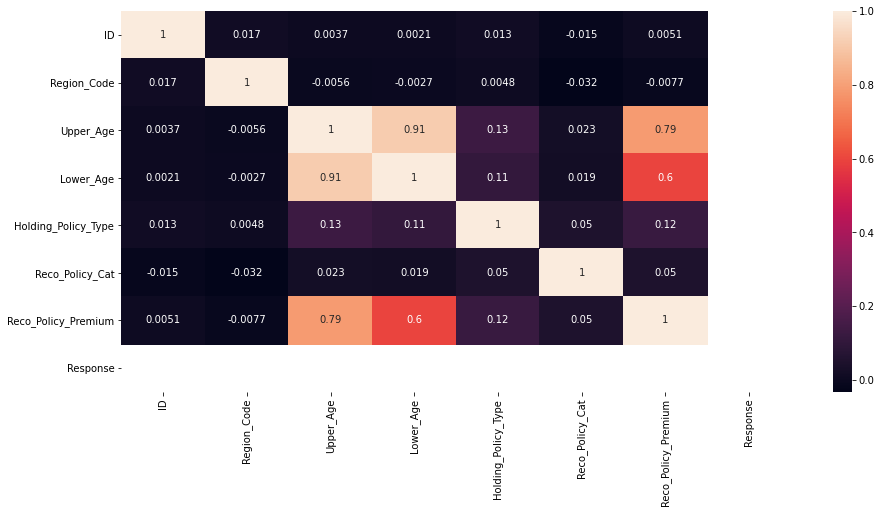

In [3]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True)